In [65]:
# Observable Trends
# 1. The vast majority of rides and fares come from Urban areas. 
# 2. While overall less money is gained from rural areas, the average ride is much higher $ value in suburban and rural areas. 
# 3. Urban cities have many more drivers than rural cities. 

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 

In [2]:
city_data = pd.read_csv('raw_data/city_data.csv')
ride_data = pd.read_csv('raw_data/ride_data.csv')

In [70]:
combined_df = pd.merge(city_data, ride_data, on=["city", "city"], how='right')
combined_df = combined_df.rename(columns={'driver_count': 'driver_count_per_city'})
combined_df.head()

,city,driver_count_per_city,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
mean_fare_per_city = combined_df.groupby("city").fare.mean().tolist()
ride_count_per_city = combined_df.groupby("city").date.count().tolist()

In [5]:
#Drivers Per City Alphabetical List 
urban_cities_df = combined_df[combined_df['type'] == "Urban"]
suburban_cities_df = combined_df[combined_df['type'] == "Suburban"]
rural_cities_df = combined_df[combined_df['type'] == "Rural"]

urban_driver_count_alph = urban_cities_df.loc[:, ['city', "driver_count_per_city"]].drop_duplicates().sort_values("city")['driver_count_per_city'].tolist()
suburban_driver_count_alph = suburban_cities_df.loc[:, ['city', "driver_count_per_city"]].drop_duplicates().sort_values("city")['driver_count_per_city'].tolist()
rural_driver_count_alph = rural_cities_df.loc[:, ['city', "driver_count_per_city"]].drop_duplicates().sort_values("city")['driver_count_per_city'].tolist()

In [6]:
# Ride Counts Per City Calc in Alphabetical Order
urban_rides_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Urban"].groupby('city').type.count().tolist()
suburban_rides_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Suburban"].groupby('city').type.count().tolist()
rural_rides_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Rural"].groupby('city').type.count().tolist()

In [7]:
 # Average Fares Per City Calc in Alphabetical Order

urban_avg_fare_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Urban"].groupby('city').mean().fare.tolist()
suburban_avg_fare_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Suburban"].groupby('city').mean().fare.tolist()
rural_avg_fare_per_city_alph = combined_df[combined_df.loc[:,'type'] == "Rural"].groupby('city').mean().fare.tolist()

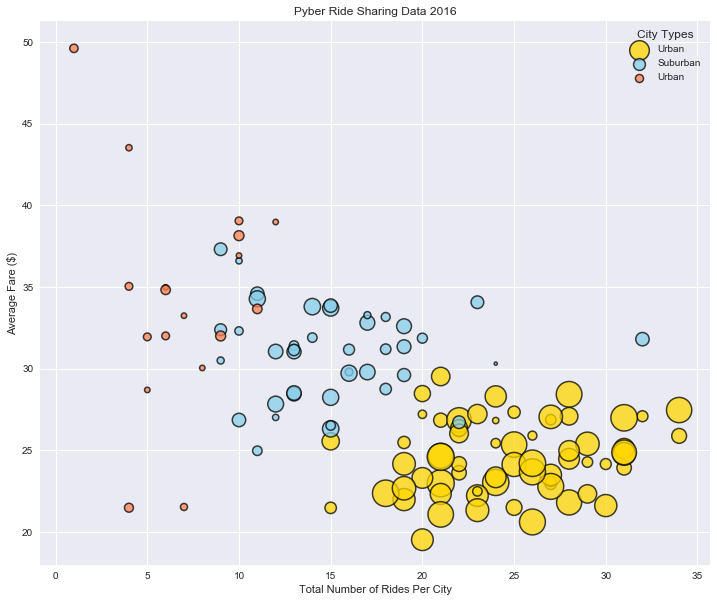

In [69]:
#Scatter Plot
sns.set()
plt.figure(figsize=(12,10))
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.scatter(urban_rides_per_city_alph, urban_avg_fare_per_city_alph, s=[x * 10 for x in urban_driver_count_alph], facecolor='gold', alpha=.75,  label='Urban', edgecolors='black', marker="o", linewidth=1.5)
plt.scatter(suburban_rides_per_city_alph, suburban_avg_fare_per_city_alph, s=[x * 10 for x in suburban_driver_count_alph], facecolor='skyblue', alpha=.75,  label='Suburban', edgecolors='black', marker="o", linewidth=1.5)
plt.scatter(rural_rides_per_city_alph, rural_avg_fare_per_city_alph, s=[x * 10 for x in rural_driver_count_alph], facecolor='coral', alpha=.75,  label='Urban', edgecolors='black', marker="o", linewidth=1.5)
plt.legend(title="City Types", loc='best')
plt.show()

In [9]:
total_fares = combined_df.fare.sum()
rural_fares = combined_df.groupby('type').sum().loc['Rural', 'fare']
urban_fares = combined_df.groupby('type').sum().loc['Urban', 'fare']
suburban_fares = combined_df.groupby('type').sum().loc['Suburban', 'fare']


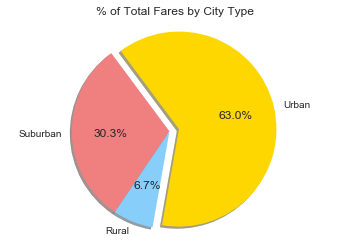

In [58]:
#Percentage of Total Fares by City Type Pie Chart

number_of_urban = combined_df[combined_df.loc[:,'type'] == "Urban"].fare.sum()
number_of_suburban = combined_df[combined_df.loc[:,'type'] == "Suburban"].fare.sum()
number_of_rural = combined_df[combined_df.loc[:,'type'] == "Rural"].fare.sum()
number_of_fares = combined_df.fare.sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-110)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
plt.show()

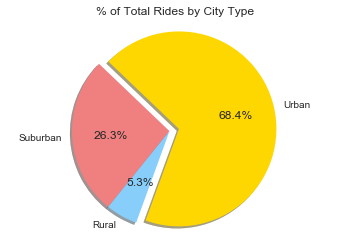

In [61]:
#Percentage of Total Rides by City Type Pie Chart

number_of_urban = combined_df[combined_df.loc[:,'type'] == "Urban"].city.count()
number_of_suburban = combined_df[combined_df.loc[:,'type'] == "Suburban"].city.count()
number_of_rural = combined_df[combined_df.loc[:,'type'] == "Rural"].city.count()
number_of_fares = combined_df.city.count()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-110)
plt.axis('equal')
plt.title("% of Total Rides by City Type")
plt.show()

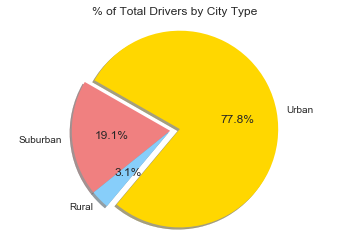

In [64]:
#Percentage of Total Drivers by City Type Pie Chart

number_of_urban = combined_df[combined_df.loc[:,'type'] == "Urban"].loc[:,['city', 'driver_count_per_city']].drop_duplicates().driver_count_per_city.sum()
number_of_suburban = combined_df[combined_df.loc[:,'type'] == "Suburban"].loc[:,['city', 'driver_count_per_city']].drop_duplicates().driver_count_per_city.sum()
number_of_rural = combined_df[combined_df.loc[:,'type'] == "Rural"].loc[:,['city', 'driver_count_per_city']].drop_duplicates().driver_count_per_city.sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-130)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
plt.show()